In [18]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
from libs.datasets import MNIST
import os
import pandas as pd
from libs.utils import montage
from libs import gif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn import preprocessing
from six.moves import cPickle as pickle
import seaborn as sns
%matplotlib inline

# Data

In [22]:
rootdir = "db/notMNIST_large/"
image_names = []
labels = []
[subdirs for subdirs in os.listdir(rootdir)]
#[img for img in os.listdir(d) if img.endswith('png')]
for dirpath, dirname, files in os.walk(rootdir):
    for f in files:
        if f.endswith('.png'):
            image_names.append(os.path.join(dirpath,f))
            labels.append(dirpath.split('/')[2])
print image_names[:5], labels[:5], len(image_names)
print len(image_names)

['db/notMNIST_large/A/a29ydW5pc2hpLnR0Zg==.png', 'db/notMNIST_large/A/a2F6b28udHRm.png', 'db/notMNIST_large/A/a2FkZW4udHRm.png', 'db/notMNIST_large/A/a2FpcmVlLnR0Zg==.png', 'db/notMNIST_large/A/a2Fua2FuYSBLLnR0Zg==.png'] ['A', 'A', 'A', 'A', 'A'] 529119
529119


### Save name data

In [23]:
def do_pickle(dataset, set_filename):
    try:
        with open(set_filename, 'wb') as f:
            pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', set_filename, ':', e)

do_pickle([image_names, labels], "data_names.pkl")

### Load name data

In [24]:
pickle_file = 'data_names.pkl'
def do_unpickle(pickle_file):
    with open(pickle_file, 'rb') as f:
        data = pickle.load(f)
    return data

[image_names, labels] = do_unpickle(pickle_file)
print len(image_names), len(labels)

529119 529119


### Read dataset

In [87]:
def load_data(number_of_images=1000):
    data = []
    target = []
    for i in range(1, number_of_images + 1):
        rand_int = np.random.randint(0,len(image_names))
        img_name = image_names[rand_int]
        label = labels[rand_int]
        try:
            img = plt.imread(img_name)
        except:
            continue
        data.append(img)
        target.append(label)
    #     plt.subplot(number_of_images,1,i)
    #     plt.imshow(img)
    #     plt.ylabel(label)
    return np.array(data), target

N = 5000
tensor_data, target = load_data(N)

In [88]:
print "data shape:", tensor_data.shape
print "target shape:", len(target)

data shape: (5000, 28, 28)
target shape: 5000


### Save image data

In [89]:
do_pickle([tensor_data, target], "tensor_data.pkl")

### Load pickled image data

In [90]:
pickle_file = 'tensor_data.pkl'
[tensor_data, target] = do_unpickle(pickle_file)
print len(tensor_data), len(target)

5000 5000


# Pre-processing

### Features

J
(5000, 784)


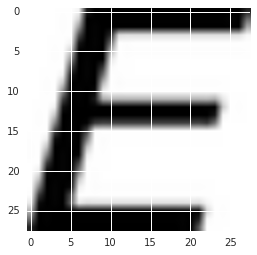

In [91]:
X = tensor_data.reshape([N,28*28])
y = target
img = X[0].reshape((28,28))
print target[89]
plt.imshow(img)
print X.shape

(5000, 784)
mean: -2.33630743196e-07 std: 1.0


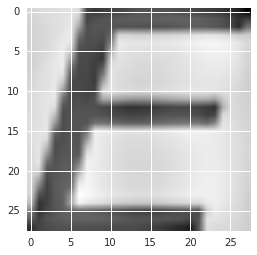

In [92]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
print X_scaled.shape
plt.imshow(X_scaled[0].reshape(28,28))
print "mean: {} std: {}".format(X_scaled.mean(), X_scaled.std())

key:  A #: 485
key:  C #: 504
key:  B #: 502
key:  E #: 533
key:  D #: 476
key:  G #: 495
key:  F #: 519
key:  I #: 483
key:  H #: 519
key:  J #: 484


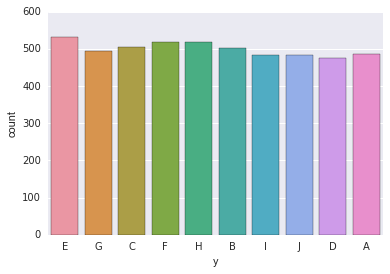

In [93]:
counter_dict = {}
for el in y:
    if el in counter_dict:
        counter_dict[el] += 1
    else:
        counter_dict[el] = 1

for key in counter_dict:
    print "key: ", key, "#:", counter_dict[key]

df = pd.DataFrame(data = y, columns=['y'])
# df.y.value_counts().plot(kind='bar')
sns.countplot(x=df.y, data=df)

### Labels

In [30]:
# # binarize labels
# y = target
# label_encoder = preprocessing.LabelBinarizer()
# label_encoder.fit(y)
# print "classes:", label_encoder.classes_
# encoded = label_encoder.transform(y)
# original = label_encoder.inverse_transform(encoded)
# print encoded[0], original[0]
# y = encoded

# Test/train/validation split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.10, stratify = y)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=10/90., stratify=y_train)
print "unique classes: ", np.unique(target)
print "number of classes:", len(np.unique(target))
print np.shape(X_train), np.shape(X_test), np.shape(X_validation)
print np.shape(y_train), np.shape(y_test), np.shape(y_validation)

unique classes:  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']
number of classes: 10
(4000, 784) (500, 784) (500, 784)
(4000,) (500,) (500,)


In [31]:
# plt.figure()
# plt.title('train')
# train = label_encoder.inverse_transform(y_train)
# df = pd.DataFrame(data = train, columns=['train'])
# # df.train.value_counts().plot(kind='bar')
# order = ("A", "B", "C", "D", "E", "F", "G", "H", "I", "J")
# sns.countplot(x=df.train, data=df, order=order)

# plt.figure()
# plt.title('test')
# test = label_encoder.inverse_transform(y_test)
# df = pd.DataFrame(data = test, columns=['test'])
# # df.test.value_counts().plot(kind='bar')
# sns.countplot(x=df.test, data=df, order=order)

# plt.figure()
# plt.title('validation')
# validation = label_encoder.inverse_transform(y_validation)
# df = pd.DataFrame(data = validation, columns=['validation'])
# sns.countplot(x=df.validation, data=df, order=order)

### Save/load data splits

In [98]:
data = {}
# data['train'] = [X_train, y_train]
# data['test'] = [X_test, y_test]
# data['validation'] = [X_validation, y_validation]
data['scaler'] = scaler
data['X_scaled'] = X_scaled
data['y'] = y
do_pickle(data,"processed_data.pkl")

In [99]:
data = do_unpickle("processed_data.pkl")
# [X_train, y_train] = data['train']
# [X_test, y_test] = data['test']
# [X_validation, y_validation] = data['validation']
scaler = data['scaler']
y = data['y']
X_scaled = data['X_scaled']

# Logit classification (sklearn)

In [67]:
logreg = LogisticRegression()#C=1e5)
logreg.fit(X_train,y_train)
print logreg.score(X_train, y_train)
print logreg.score(X_test, y_test)
print logreg.score(X_validation, y_validation)

0.9940625
0.715
0.7


In [42]:
N = 50
def train_logit(N):
    logreg = LogisticRegression()#C=1e5)
    logreg.fit(X_train[:N],y_train[:N])
    print logreg.score(X_train[:N], y_train[:N])
    print logreg.score(X_validation[:N], y_validation[:N])
    print logreg.score(X_test[:N], y_test[:N])

train_logit(N)

1.0
0.6
0.62


In [43]:
N = 100
train_logit(N)

1.0
0.64
0.63


In [44]:
N = 1000
train_logit(N)

0.997
0.756666666667
0.713333333333


In [45]:
N = 5000
train_logit(N)

0.994583333333
0.76
0.696666666667


# Deep Learning

In [128]:
image_size = 28
num_labels = 10
N = 5000

# load saved data
data = do_unpickle("processed_data.pkl")
X_scaled = data['X_scaled']
y= data['y']
scaler = data['scaler']
print X_scaled.shape

(5000, 784)


B


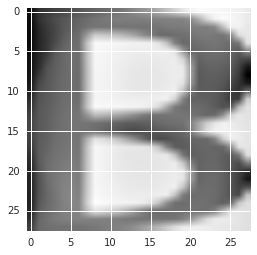

In [125]:
plt.imshow(X_scaled[10].reshape(image_size, image_size))
print y[10]

In [129]:
# binarize labels
label_encoder = preprocessing.LabelBinarizer()
label_encoder.fit(y)
print "classes:", label_encoder.classes_
encoded = label_encoder.transform(y)
original = label_encoder.inverse_transform(encoded)
print "encoded and original:", encoded[10], original[10]

classes: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']
encoded and original: [0 1 0 0 0 0 0 0 0 0] B


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, encoded, test_size=0.10, stratify=encoded)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=10/90., stratify=y_train)
print "training size:", X_train.shape, "testing size:", X_test.shape, "validation size:", X_validation.shape
print "training label size:", np.shape(y_train)

training size: (4000, 784) testing size: (500, 784) validation size: (500, 784)
training label size: (4000, 10)


In [132]:
data = {}
data['train'] = [X_train, y_train]
data['test'] = [X_test, y_test]
data['validation'] = [X_validation, y_validation]
data['scaler'] = scaler
data['label_encoder'] = label_encoder
data['X_scaled'] = X_scaled
data['y_'] = encoded
data['y'] = y
do_pickle(data,"processed_data_binarized_labels.pkl")

In [137]:
data = do_unpickle("processed_data_binarized_labels.pkl")
[X_train, y_train] = data['train']
[X_test, y_test] = data['test']
[X_validation, y_validation] = data['validation']
scaler = data['scaler']
label_encoder = data['label_encoder']
y = data['y']
y_ = data['y_']

In [138]:
print y_[0], y[0]

[0 0 0 0 1 0 0 0 0 0] E


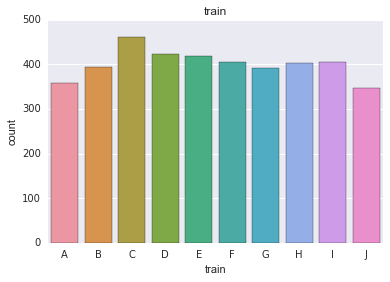

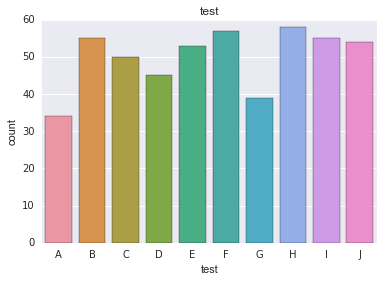

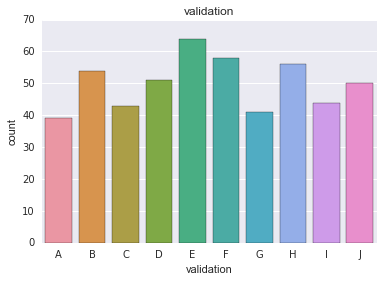

In [139]:
plt.figure()
plt.title('train')
train = label_encoder.inverse_transform(y_train)
df = pd.DataFrame(data = train, columns=['train'])
# df.train.value_counts().plot(kind='bar')
order = ("A", "B", "C", "D", "E", "F", "G", "H", "I", "J")
sns.countplot(x=df.train, data=df, order=order)

plt.figure()
plt.title('test')
test = label_encoder.inverse_transform(y_test)
df = pd.DataFrame(data = test, columns=['test'])
# df.test.value_counts().plot(kind='bar')
sns.countplot(x=df.test, data=df, order=order)

plt.figure()
plt.title('validation')
validation = label_encoder.inverse_transform(y_validation)
df = pd.DataFrame(data = validation, columns=['validation'])
sns.countplot(x=df.validation, data=df, order=order)

# Logit batch gradient training with TF

In [159]:
train_subset = 4000
graph = tf.Graph()
with graph.as_default():
    tf_train_dataset = tf.constant(X_train[:train_subset, :])
    tf_train_labels = tf.constant(y_train[:train_subset])
    tf_valid_dataset = tf.constant(X_validation)
    tf_test_dataset = tf.constant(X_test)
    weights = tf.Variable(
        tf.truncated_normal([image_size * image_size, num_labels])
    )
    biases = tf.Variable(tf.zeros([num_labels]))
    logits = tf.matmul(tf_train_dataset, weights) + biases
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(
    tf.matmul(tf_valid_dataset, weights) + biases
    )
    test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases)

In [160]:
num_steps = 801

def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print('Initialized')
    for step in range(num_steps):
        # Run the computations. We tell .run() that we want to run the optimizer,
        # and get the loss value and the training predictions returned as numpy
        # arrays.
        _, l, predictions = session.run([optimizer, loss, train_prediction])
        if (step % 100 == 0):
            print('Loss at step %d: %f' % (step, l))
            print('Training accuracy: %.1f%%' % accuracy(
            predictions, y_train[:train_subset, :]))
            # Calling .eval() on valid_prediction is basically like calling run(), but
            # just to get that one numpy array. Note that it recomputes all its graph
            # dependencies.
            print('Validation accuracy: %.1f%%' % accuracy(
                valid_prediction.eval(), y_validation))
    print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), y_test))

Initialized
Loss at step 0: 41.018246
Training accuracy: 5.8%
Validation accuracy: 16.4%
Loss at step 100: 2.128029
Training accuracy: 82.3%
Validation accuracy: 77.2%
Loss at step 200: 1.181567
Training accuracy: 88.7%
Validation accuracy: 81.0%
Loss at step 300: 0.800124
Training accuracy: 91.8%
Validation accuracy: 85.2%
Loss at step 400: 0.582806
Training accuracy: 93.9%
Validation accuracy: 86.4%
Loss at step 500: 0.436629
Training accuracy: 95.1%
Validation accuracy: 88.6%
Loss at step 600: 0.331199
Training accuracy: 96.2%
Validation accuracy: 89.2%
Loss at step 700: 0.256692
Training accuracy: 97.2%
Validation accuracy: 90.4%
Loss at step 800: 0.203516
Training accuracy: 97.7%
Validation accuracy: 90.6%
Test accuracy: 82.6%


# Logit mini-batch gradient descent with TF

In [161]:
batch_size = 128
graph = tf.Graph()
with graph.as_default():
#     tf_train_dataset = tf.constant(X_train[:train_subset, :])
    tf_train_dataset = tf.placeholder(tf.float32,
                                      shape=(batch_size, image_size * image_size))
#     tf_train_labels = tf.constant(y_train[:train_subset])
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(X_validation)
    tf_test_dataset = tf.constant(X_test)
    
    weights = tf.Variable(
        tf.truncated_normal([image_size * image_size, num_labels])
    )
    biases = tf.Variable(tf.zeros([num_labels]))
    
    logits = tf.matmul(tf_train_dataset, weights) + biases
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
    
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(
    tf.matmul(tf_valid_dataset, weights) + biases)
    test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases)


In [162]:
num_steps = 1000

def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print('Initialized')
    for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        offset = (step * batch_size) % (y_train.shape[0] - batch_size)
        # Generate a minibatch.
        batch_data = X_train[offset:(offset + batch_size), :]
        batch_labels = y_train[offset:(offset + batch_size), :]
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction],feed_dict=feed_dict)
        if (step % 100 == 0):
            print('Minibatch loss at step %d: %f' % (step, l))
            print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
            # Calling .eval() on valid_prediction is basically like calling run(), but
            # just to get that one numpy array. Note that it recomputes all its graph
            # dependencies.
            print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(), y_validation))
    print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), y_test))

Initialized
Minibatch loss at step 0: 30.553928
Minibatch accuracy: 17.2%
Validation accuracy: 25.8%
Minibatch loss at step 100: 2.110516
Minibatch accuracy: 81.2%
Validation accuracy: 74.2%
Minibatch loss at step 200: 0.847002
Minibatch accuracy: 88.3%
Validation accuracy: 79.4%
Minibatch loss at step 300: 1.150940
Minibatch accuracy: 85.2%
Validation accuracy: 83.8%
Minibatch loss at step 400: 0.459306
Minibatch accuracy: 91.4%
Validation accuracy: 83.8%
Minibatch loss at step 500: 0.560045
Minibatch accuracy: 93.0%
Validation accuracy: 86.8%
Minibatch loss at step 600: 0.523847
Minibatch accuracy: 95.3%
Validation accuracy: 86.6%
Minibatch loss at step 700: 0.179322
Minibatch accuracy: 96.9%
Validation accuracy: 88.2%
Minibatch loss at step 800: 0.257968
Minibatch accuracy: 96.9%
Validation accuracy: 88.4%
Minibatch loss at step 900: 0.569536
Minibatch accuracy: 96.1%
Validation accuracy: 86.4%
Test accuracy: 83.2%


# Neural net mini-batch with TF

In [165]:
batch_size = 128
graph = tf.Graph()
num_hidden_nodes = 1024

with graph.as_default():
#     tf_train_dataset = tf.constant(X_train[:train_subset, :])
    tf_train_dataset = tf.placeholder(tf.float32,
                                      shape=(batch_size, image_size * image_size))
#     tf_train_labels = tf.constant(y_train[:train_subset])
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(X_validation)
    tf_test_dataset = tf.constant(X_test)
    
    W1 = tf.Variable(
        tf.truncated_normal([image_size * image_size, num_hidden_nodes])
    )
    biases1 = tf.Variable(tf.zeros([num_hidden_nodes]))
    
    W2 = tf.Variable(
        tf.truncated_normal([num_hidden_nodes, num_labels])
    )
    biases2 = tf.Variable(tf.zeros([num_labels]))
    
    relus = tf.matmul(tf_train_dataset, W1) + biases1
    layer1 = tf.nn.relu(relus)
    logits = tf.matmul(layer1, W2) + biases2
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
    
    train_prediction = tf.nn.softmax(logits)
    layer1_valid = tf.nn.relu(tf.matmul(tf_valid_dataset, W1) + biases1)
    valid_prediction = tf.nn.softmax(tf.matmul(layer1_valid, W2) + biases2)
    
    layer1_test = tf.nn.relu(tf.matmul(tf_test_dataset, W1) + biases1)
    test_prediction = tf.nn.softmax(tf.matmul(layer1_test, W2) + biases2)


In [166]:
num_steps = 2000

def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print('Initialized')
    for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        offset = (step * batch_size) % (y_train.shape[0] - batch_size)
        # Generate a minibatch.
        batch_data = X_train[offset:(offset + batch_size), :]
        batch_labels = y_train[offset:(offset + batch_size), :]
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction],feed_dict=feed_dict)
        if (step % 100 == 0):
            print('Minibatch loss at step %d: %f' % (step, l))
            print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
            # Calling .eval() on valid_prediction is basically like calling run(), but
            # just to get that one numpy array. Note that it recomputes all its graph
            # dependencies.
            print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(), y_validation))
    print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), y_test))

Initialized
Minibatch loss at step 0: 768.523682
Minibatch accuracy: 7.8%
Validation accuracy: 43.0%
Minibatch loss at step 100: 1.744203
Minibatch accuracy: 98.4%
Validation accuracy: 92.0%
Minibatch loss at step 200: 0.000000
Minibatch accuracy: 100.0%
Validation accuracy: 95.4%
Minibatch loss at step 300: 2.343038
Minibatch accuracy: 99.2%
Validation accuracy: 95.6%
Minibatch loss at step 400: 0.000410
Minibatch accuracy: 100.0%
Validation accuracy: 95.8%
Minibatch loss at step 500: 0.056251
Minibatch accuracy: 98.4%
Validation accuracy: 95.8%
Minibatch loss at step 600: 0.002520
Minibatch accuracy: 100.0%
Validation accuracy: 95.8%
Minibatch loss at step 700: 0.000262
Minibatch accuracy: 100.0%
Validation accuracy: 95.8%
Minibatch loss at step 800: 0.003342
Minibatch accuracy: 100.0%
Validation accuracy: 95.8%
Minibatch loss at step 900: 0.059221
Minibatch accuracy: 98.4%
Validation accuracy: 95.8%
Minibatch loss at step 1000: 0.000989
Minibatch accuracy: 100.0%
Validation accuracy

# Regularization

### Logit

In [ ]:
batch_size = 128
graph = tf.Graph()

with graph.as_default():
    tf_train_dataset = tf.placeholder(tf.float32,shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(X_validation)
    tf_test_dataset = tf.constant(X_test)
    regularization = tf.placeholder(tf.float32)
    
    weights = tf.Variable(tf.truncated_normal([image_size * image_size, num_labels]))
    biases = tf.Variable(tf.zeros([num_labels]))
    
    logits = tf.matmul(tf_train_dataset, weights) + biases
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
    
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(
    tf.matmul(tf_valid_dataset, weights) + biases)
    test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases)
